# Worksheet 2: Using the Python Iris library for analysis and visualisation

In this worksheet, sample PRECIS output over Southeast Asia is compared with observations for validation purposes. Validating model results by comparing with observed data is an essential step - this is the measure by which we can assess the quality of the model and it informs appropriate uses of the data.


Here, we validate PRECIS output driven by two different GCMs (HadCM3Q0 and ECHAM5). Using data from both experiments will give us two representations of present day climate and two possible climate scenarios. For more details on multimodel approaches, refer to the PRECIS workshop lecture on climate model ensembles.

The following exercises provide examples of how analysis can be undertaken as part of a model validation. The methods shown are not necessarily the only way to proceed and are intended to demonstrate the use of Iris in model validation, and provide a starting point for your own analyses. For further help on validating your PRECIS simulations, refer to the PRECIS workshop lecture on model evaluation.

<div class="alert alert-block alert-warning">
<b>By the end of this worksheet you should be able to:</b><br> 
- Apply basic statistical operations to Iris cubes. <br>
- Plot information from Iris cubes.<br>
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> The data used here has been processed in the same way as Worksheet 1. The 8 point-rim has been removed and it has been converted from PP to NetCDF format.
</div>

## Contents
### [2.1: Inspecting the data](#2.1) 
### [2.2: Converting units](#2.2)
### [2.3: Climatological mean calculation](#2.3)
### [2.4: IRIS quick plotting and visualising data](#2.4)

## Preamble
Run the code preamble below to import the necessary libraries for this worksheet.

To run the code, click in the box below and press <kbd>Ctrl</kbd> + <kbd>Enter</kbd>.

In [8]:
# Code preamble - these libraries will be used in this worksheet.
# This code block needs to be re-run every time you restart this worksheet!
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
import calendar
import iris
import iris.coord_categorisation
import iris.quickplot as qplt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes

<a id='2.1'></a>
# 2.1 Inspecting the data

The datasets used here contain daily and monthly data from two PRECIS runs carried out over Southeast Asia, one driven by HadCM3Q0 and the other driven by ECHAM5. The observations used for comparison are from the APHRODITE gridded observational data set (http://www.chikyu.ac.jp/precip/english/index.html).
<p><img src="img/two_runids.jpg" alt="PRECIS runid flow" style="float: center; height: 200px;"/></p>

In Iris, data are read into an object called a **cube**. A cube contains the data of interest (e.g., temperature, rainfall, wind speeds) and metadata about that variable. A single cube describes only one variable; it is not possible for a cube to contain both temperature and rainfall, for example. A cube always has a name, a unit and an n-dimensional data array to represents the cube’s data. Additionally, the cube contains collections of coordinates.  Coordinate types can include spatial information (latitude, longitude, altitude), a time dimension, or other information, e.g., an ensemble number.

<p><img src="img/multi_array_to_cube.png" alt="Example Iris cube" style="float: center; height: 300px;"/></p>


__a) Load the NetCDF file for the HadCM3Q0 and ECHAM5 model data and the APHRODITE rainfall observation data and print the cube output__

A cube has coordinates (e.g. time, longitude, latitude, model levels) which can be accessed with Python commands. In the following exercise we find the latitude and longitude covered by the APHRODITE data. This can be done by printing the latitude and longitude coordinates (`.points`), noting the first and last values in the array. A similar example can be found in the [Iris documentation](http://scitools.org.uk/iris/docs/latest/userguide/navigating_a_cube.html#accessing-coordinates-on-the-cube). 

Before running the code, take a look at it line by line to understand what steps are being taken. Then click in the box and press <kbd>ctrl</kbd> + <kbd>enter</kbd> to run the code.

In [9]:
# Provide the names of the directories where the netCDF model files are stored
DATADIR = '/project/precis/worksheets/data/'

# Load and print the HadCM3Q0 (cahpa) model cube data
infile = os.path.join(DATADIR, 'historical', 'cahpa.mon.1961_1990.pr.rr.nc')
cahpaData = iris.load_cube(infile)

# Load and print the ECHAM5 (cahpb) model cube data
infile = os.path.join(DATADIR, 'historical', 'cahpb.mon.1961_1990.pr.rr.nc')
cahpbData = iris.load_cube(infile)

# Load and print the APHRODITE observation cube data
infile = os.path.join(DATADIR, 'APHRODITE', 'aphro.mon.1961_1990.nc')
aphroData = iris.load_cube(infile)

---
<div class="alert alert-block alert-success">
    <b>Question:</b> How many years of data does the Aphrodite dataset contain?
</div>

---

__b) Extract a subset of the data within a cube__

Data extraction is an important function in Iris. The extraction of a subset of data is called **slicing**.  For example, it could be necessary to extract data over all latitude and longitude grid points on the first time step. For more information around subsetting cubes please read the [Iris documentation on slicing](http://scitools.org.uk/iris/docs/latest/userguide/subsetting_a_cube.html#cube-indexing).

__Using the HadCM3Q0 (cahpa) data, the example below shows how to subset a cube for the first and last timesteps. This method will be used later for plotting data from a cube.__ 

Work through the example below line by line then click in the box and press <kbd>Ctrl</kbd> + <kbd>Enter</kbd> to run the code.

First, print the HadCM3QO (cahpa) cube, containing all the time steps:

In [ ]:
# Use the print() command to display a summary of the HadCM3Q0 cube


---
<div class="alert alert-block alert-success">
<b>Question:</b> What dimensions does this cube have? <br>
    t = number of timesteps <br>
    y = number of latitude steps <br>
    x = number of longitude steps <br>
    Write your answer in the form `[ t, y, x ]`
</div>

<b>Answer:</b><br>
Cahpa dimensions: [ t, y, x]

---

<div class="alert alert-block alert-info">
<b>Note:</b> When indexing a cube dimension, you either can specify a single coordinate, e.g. <code>0</code> is the first (zeroth) item, or you can use <b><code>:</code></b> to include <b>all items</b>.<br>
</div>

Display the cube's **first** timestep and check the associated `time` value:

In [ ]:
# Use the print() function with slicing notation


Display the cube's **last** timestep and check the associated `time` value:

In [ ]:
# Use the print() function with slicing notation


<a id='2.2'></a>
## 2.2 Converting units

__c) Convert the precipitation units from kg/m2/s (equivalent to mm/s) to mm/day__

To convert to mm/day, we could just multiply the raw data (in mm/s) by 86400 seconds, but a clearer way is to use the __`.convert_units()`__ method with the name of the units we want to convert the data into.

Let's do this for the __cahpa__ historical data first and break down the steps as follows:

* Print the units and summary statistic about the data
* Convert the unit and print the information again
* Rename the `.units` value in the cube and save it as a new netCDF file

In [ ]:
print(cahpaData)

In [ ]:
# print the unit
print('The current unit for data is: {}'.format(cahpaData.units))
# print the summary statistic (maximum monthly precipitation)
maxpr = np.max(cahpaData.data)
print('This is an example rainfall rate (kg m-2 s-1) prior to conversion: {:f}'.format(maxpr))

In [10]:
# Convert units to kg m-2 day-1 (same as multiplying by 86400 seconds)
cahpaData.convert_units('kg m-2 day-1')
# Print cube.units to view new units for precipitation
print('The new rainfall units are: {}'.format(cahpaData.units))
maxpr = np.max(cahpaData.data)
# print the summary statistic (maximum monthly precipitation) after the unit conversion
print('This is the same rainfall rate but now in (kg m-2 day-1): {:f}'.format(maxpr))

The new rainfall units are: kg m-2 day-1
This is the same rainfall rate but now in (kg m-2 day-1): 204.724182


Rename the new cube units for consistency, then save the converted cube:

In [11]:
# Rename cube units
cahpaData.units = 'mm day-1'
# Remove extraneous cube metadata.  This helps make cube comparisons easier later.
cahpaData.remove_coord('forecast_period')
cahpaData.remove_coord('forecast_reference_time')
# Save the new cube as a new netCDF file
outfile = os.path.join(DATADIR, 'historical', 'cahpa.mon.1961_1990.pr.rr.mmday-1.nc')
iris.save(cahpaData, outfile)

Complete the follow code block to repeat the same procedure for __cahpb__:

In [12]:
# Print the current cahpb cube units
print('The current unit for data is: {}'.format( ))

# convert units to kg m-2 day-1


# Rename the units to mm day-1. Recall that 1 kg m-2 is equivalent to 1 mm of rain


# save the cube into a new netCDF file


<a id='2.3'></a>
## 2.3 Climatological seasonal mean calculation

__d) Calculate the 1961-1990 seasonal mean precipitation__ field for October-December (OND) from both the HadCM3Q0 (cahpa) and ECHAM5 (cahpb) driven PRECIS runs.

Work through the example below line by line then click in the box and press <kbd>ctrl</kbd> + <kbd>enter</kbd> to run the code.

In [13]:
# Define output location
outdir = os.path.join(DATADIR, 'climatology/')
# Check to see if this directory exists, if not create it
if not os.path.isdir(outdir):
    # Make directory
    os.mkdir(outdir)
    # Set directory permissions 
    os.chmod(outdir, 0o776)

# Loop through two model runs
for jobid in ['cahpa', 'cahpb']:
    infile = os.path.join(DATADIR, 'historical', jobid + '.mon.1961_1990.pr.rr.mmday-1.nc')

    # Load the data
    data = iris.load_cube(infile)

    # In order to calculate OND mean, we use the command below to add a season membership coordinate.
    # The seasons can be any sequence of months, identified by the first letters of the names of the months.
    # Here, we define two seasons, jfmamjjas (the months we are not interested in) and ond (October, November and
    # December); the months we do want.
    iris.coord_categorisation.add_season(data, 'time', name='seasons', seasons=('jfmamjjas','ond'))

    # This command extracts data for the OND season using a constraint
    data_ond = data.extract(iris.Constraint(seasons='ond'))

    # The cube 'data_ond' contains data from October-December for all years. 
    # The command below calculates the mean over all years.
    seasonal_mean = data_ond.aggregated_by(['seasons'], iris.analysis.MEAN)
    
    # Save the OND seasonal mean as a netCDF
    outfile = os.path.join(outdir, jobid + '.OND.mean.1961_1990.pr.mmday-1.nc')
    iris.save(seasonal_mean, outfile)

---
<div class="alert alert-block alert-success">
<b>Question:</b> What dimensions does this cube have now? <br>
    t = number of timesteps <br>
    y = number of latitude steps <br>
    x = number of longitude steps <br>
    Write your answer in the form `[ t, y, x ]` <br>
    Compare your answer to the answer you found in <strong> (b)</strong>. Which dimensions have changed?
</div>

<b>Answer:</b><br>
Seasonal mean dimensions: [ t, y, x]

---

__e) Calculate the 1961-1990 seasonal mean for OND from the APHRODITE observation data__

APHRODITE is a daily high resolution (0.25 degree) rain gauge-based precipitation data set over Asia for 1950-2007. See http://www.chikyu.ac.jp/precip/english/index.html for more information.

Follow step d) and complete the code yourself.  The file name to load is: `aphro.mon.1961_1990.nc`

In [17]:
# # Directory names where data is read from and stored to
# infile = os.path.join(DATADIR, 'APHRODITE', 'aphro.mon.1961_1990.nc')
# outdir = os.path.join(DATADIR, 'climatology') 

# # Load the aprhodite data


# # in order to calculate OND mean, need to a add season membership coordinate


# # Then constrain the cube just for the OND season


# # Now calculate the climatological mean for this season


# # save the seasonal mean cube as a NetCDF file
# outfile = os.path.join(outdir, 'aphro.OND.mean.baseline.pr.mmday-1.nc')


# print the APHRODITE seasonal mean cube

infile = os.path.join(DATADIR, 'APHRODITE', 'aphro.mon.1961_1990.nc')
aphro_cube = iris.load_cube(infile)
iris.coord_categorisation.add_season(aphro_cube, 'time', name='seasons', seasons=('jfmamjjas','ond'))
aphro_cube_ond = aphro_cube.extract(iris.Constraint(seasons='ond'))
seasonal_aphro_mean = aphro_cube_ond.aggregated_by(['seasons'], iris.analysis.MEAN)
seasonal_aphro_mean.units = 'mm day-1'
aphro_outfile = os.path.join(outdir, 'aphro.OND.mean.1961_1990.pr.mmday-1.nc')
iris.save(seasonal_aphro_mean, aphro_outfile)
print('APHRODITE: \n{}'.format(seasonal_aphro_mean))


APHRODITE: 
PP_0_5216 / (mm day-1)              (time: 1; latitude: 280; longitude: 360)
     Dimension coordinates:
          time                           x            -               -
          latitude                       -            x               -
          longitude                      -            -               x
     Auxiliary coordinates:
          seasons                        x            -               -
     Attributes:
          Conventions: CF-1.5
          history: 2012-10-03 09:51:24 UTC Aggregated by cf-python v0.9.3.3
          lbproc: 0
          runid: aaaaa
          stash_code: 5216
          submodel: 0
     Cell methods:
          mean: seasons


---
<div class="alert alert-block alert-success">
<b>Question:</b> How would you calculate the standard deviation of mean rainfall?  How about annual maximum rainfall?
</div>

<b>Answer:</b> Write the line of code required to calculate APHRODITE's (a) standard deviation and (b) annual maximum rainfall in the code block below. <br>
<b>Hint</b>: Refer to the [Iris documentation](https://scitools.org.uk/iris/docs/latest/iris/iris/analysis.html/) if needed.

In [ ]:
# From aphro_cube, calculate: 
# (a) aphro_std 


# (b) aphro_max



---

<a id='2.4'></a>
## 2.4 IRIS quick plotting and visualising data

Now we will plot the output to take a first look at what climatological winter precipitation (1961-1990 OND seasonal mean) looks like for each dataset. This section provides an initial introduction to visualising data quickly through iris, for further reading and instructions how please visit: http://scitools.org.uk/iris/docs/latest/userguide/plotting_a_cube.html


**f) Plot and compare** the climatological winter preciptation over South East Asia for three datasets.

<div class="alert alert-block alert-success">
<b>Question:</b> Work through the code block below line by line. Think about what you expect the plot setup to look like: <br> 

* Which lines of code specify the layout of sub-plots?<br>
* Will the plots have a common colour scale or seperate ones?<br>
* What is the maximum and minimum precipitation value that will be displayed? <br>
</div>

Think about your answers, then click in the box and press <kbd>ctrl</kbd> + <kbd>enter</kbd> to run the code and create the plots.

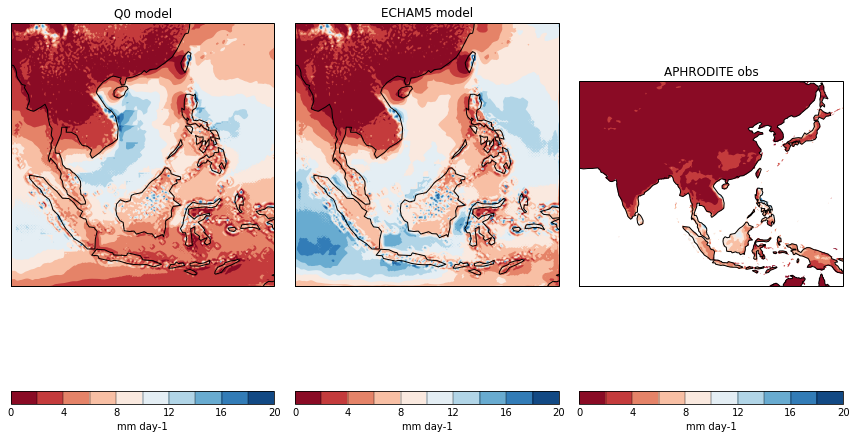

In [18]:
# Directory name where data is read from
indir = os.path.join(DATADIR, 'climatology')

# load cahpa model data
infile = os.path.join(indir, 'cahpa.OND.mean.1961_1990.pr.mmday-1.nc')
cahpa_cube = iris.load_cube(infile)

# load cahpb model data
infile = os.path.join(indir, 'cahpb.OND.mean.1961_1990.pr.mmday-1.nc')
cahpb_cube = iris.load_cube(infile)

# load APHRODITE data
infile = os.path.join(indir, 'aphro.OND.mean.1961_1990.pr.mmday-1.nc')
obs_cube   = iris.load_cube(infile)

# Do some plotting!
# Create a figure of the size 12x10 inches
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)           # Create a new subplot for the model data; 1 row x 3 columns, 1st plot
levels = range(0, 22, 2)       # Define the contour levels for all plots

# Note this is where cube slicing is needed as you can only plot 2-coordinate
# dimensions with qplt.contourf, so here we have selected time[0] as there is only
# one timestep (the baseline 1961-1990 mean)
qplt.contourf(cahpa_cube[0], levels=levels, cmap=cm.RdBu)
                               

plt.title('HadCM3Q0 model')          # plots a title for the plot
ax = plt.gca()                 # gca function that returns the current axes
ax.coastlines()                # adds coastlines defined by the axes of the plot

plt.subplot(1, 3, 2)           # Create a new subplot for the model data; 1 row x 3 columns, 2nd plot
qplt.contourf(cahpb_cube[0], levels=levels, cmap=cm.RdBu)

plt.title('ECHAM5 model')       # plots a title for the plot
ax = plt.gca()                 # gca function that returns the current axes
ax.coastlines()                # adds coastlines defined by the axes of the plot

plt.subplot(1, 3, 3)           # Create a new subplot for the observed data 1 row x 3 columns, 3rd plot
                               # This plot will be centred and below the two model plots
qplt.contourf(obs_cube[0], levels=levels, cmap=cm.RdBu)

plt.title('APHRODITE obs')     # plots a title for the plot
ax = plt.gca()                 # gca function that returns the current axes
ax.coastlines()                # adds coastlines defined by the axes of the plot

plt.tight_layout()             # automatically adjusts subplot(s) to fit in to the figure area
plt.show()

---
<div class="alert alert-block alert-success">
<b>Question:</b> 
    <br>What are the differences between the following plots for cahpa, cahpb and APHRODITE? Note the colour bars. 
    <br>Where are the largest daily rainfall rates distributed?
    <br>Why do you think this is happening?
</div>

<b>Answer:</b> *(Double click here to fill in the answers as you run and analyse each code block below)*<br>

<b>What differences do you see between the three plots?</b>


<b>Location of greatest rainfall</b>
<br> *cahpa*: 
<br> *cahpb*: 
<br> *aphrodite*:


<b>What is happening and why?</b>


<b>How could comparison be made easier?</b>

---

<center>
<div class="alert alert-block alert-warning">
<b>This completes worksheet 2.</b> <br>You have covered converting units, created seasonal means and visulised your results.<br>
In worksheet 3, you will start to consider more advanced analysis, extract regional means, look at annule cycles, work with ensemble data and produce difference plots.
</div>
</center>

<center>© Crown Copyright 2019, Met Office</center>